# ML Model Scoring and Monitoring

**Model scoring project:** Create, deploy, and monitor a risk assessment ML model that will estimate the attrition risk of each of a company's 10,000 clients. The model will enable the client managers to contact the clients with the highest risk and avoid losing clients and revenue.

A starter kit is provided which contains template scripts for each of the project steps. The kit also contains fabricated datasets that will be used for model training.

Data has been downloaded from: https://video.udacity-data.com/topher/2021/March/60412fe6_starter-file/starter-file.zip

## This deployment contains the following Jupyter notebooks:
* **Load, explore and clean a dataset.** (performed in this notebook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Receive detailed information about the datasets

## Practisedata Dataset 1

In [2]:
# Read original data
df = pd.read_csv('./practicedata/dataset1.csv')

In [3]:
# Number of data rows, number of features
df.shape

(17, 5)

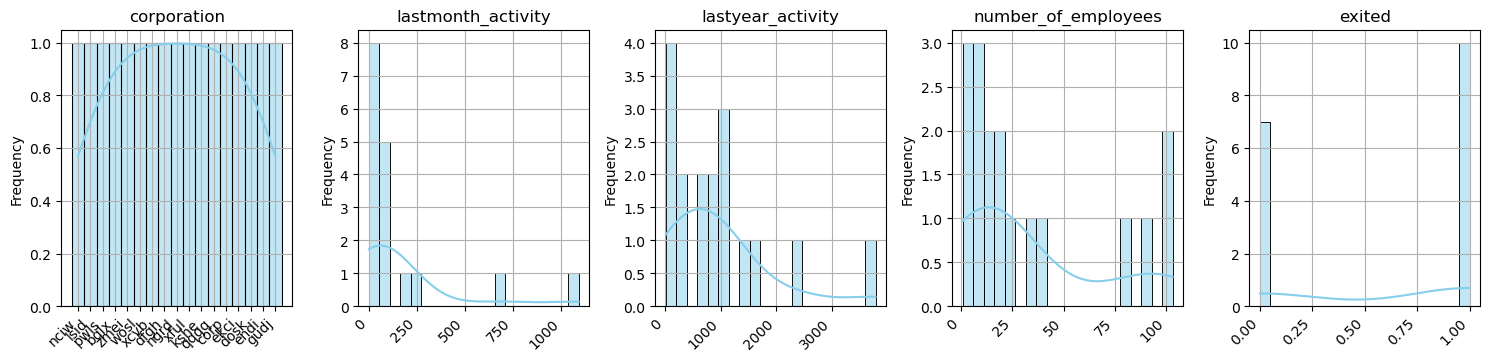

In [4]:
# Plot the data
# The dataset has 15 features, due to the information above
# Let's adjust the figsize accordingly and receive an overview of the data
plt.figure(figsize=(15, 10))

# Loop through each feature and create a subplot for its distribution
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i+1)  # 3 rows, 5 columns
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)  # Adjust bins
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True)
    # Customize x-axis ticks to show feature names
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment

plt.tight_layout()
plt.show()


In [5]:
df.describe()

,lastmonth_activity,lastyear_activity,number_of_employees,exited
count,17.000000,17.000000,17.000000,17.000000
mean,165.235294,952.882353,33.294118,0.588235
std,289.157511,973.517134,36.067237,0.507300
min,0.000000,18.000000,1.000000,0.000000
25%,16.000000,282.000000,9.000000,0.000000
50%,68.000000,800.000000,18.000000,1.000000
75%,100.000000,1028.000000,40.000000,1.000000
max,1090.000000,3782.000000,103.000000,1.000000


In [6]:
# Show first data rows
df.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,nciw,100,1359,1,0
1,lsid,68,282,14,0
2,pwls,71,949,40,1
3,bqlx,686,3782,103,0
4,zmei,45,655,7,0


## Data cleaning

In [7]:
# The data may contain spaces
# Strip leading and trailing spaces from all columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
# Check column names
df.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'exited'],
      dtype='object')

In [9]:
# Remove spaces from column names and also replace hyphen with underscore
# df.columns = df.columns.str.replace(" ", "")
df = df.rename(columns={col_name: col_name.replace(' ', '') for col_name in df.columns})
df = df.rename(columns={col_name: col_name.replace('-', '_') for col_name in df.columns})
df.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'exited'],
      dtype='object')

In [10]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

## Filter categorical and numerical columns:

In [11]:
# numColumn = list(df.select_dtypes(include = ['float', 'int']))
catColumns = df.select_dtypes(include='object').columns.tolist()
numColumns = df.select_dtypes(exclude='object').columns.tolist()

In [12]:
catColumns

['corporation']

In [13]:
numColumns

['lastmonth_activity', 'lastyear_activity', 'number_of_employees', 'exited']

In [14]:
# Save control data
output_path = 'control_data/model_scoring_practise_1_clean.csv'
df.to_csv(output_path, index=False)

## Practisedata Dataset 2

In [15]:
# Read original data
df = pd.read_csv('./practicedata/dataset2.csv')

In [16]:
# Number of data rows, number of features
df.shape

(19, 5)

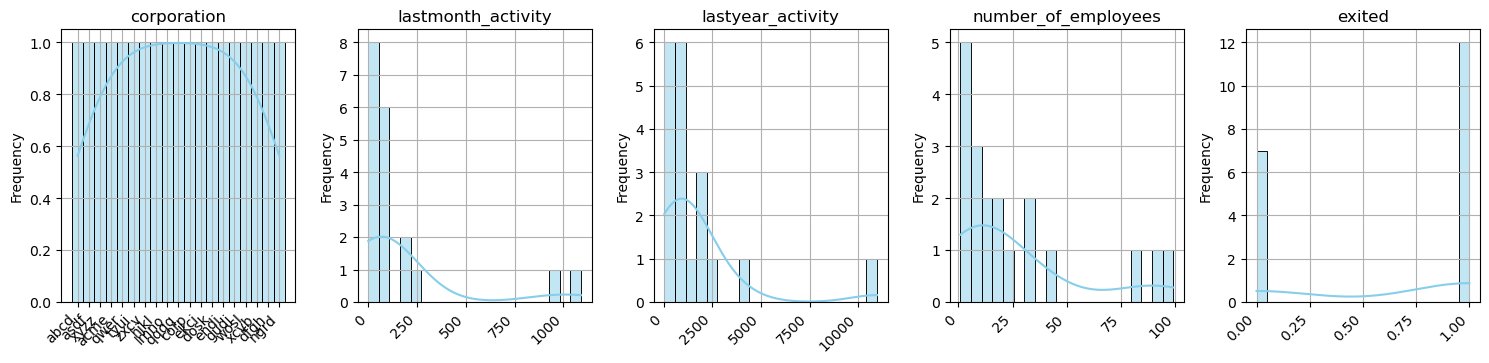

In [17]:
# Plot the data
# The dataset has 15 features, due to the information above
# Let's adjust the figsize accordingly and receive an overview of the data
plt.figure(figsize=(15, 10))

# Loop through each feature and create a subplot for its distribution
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i+1)  # 3 rows, 5 columns
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)  # Adjust bins
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True)
    # Customize x-axis ticks to show feature names
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment

plt.tight_layout()
plt.show()


In [18]:
df.describe()

,lastmonth_activity,lastyear_activity,number_of_employees,exited
count,19.000000,19.000000,19.000000,19.000000
mean,173.105263,1631.368421,26.210526,0.631579
std,304.266859,2470.024566,30.895125,0.495595
min,0.000000,18.000000,1.000000,0.000000
25%,15.000000,422.500000,5.500000,0.000000
50%,78.000000,961.000000,12.000000,1.000000
75%,141.500000,1839.500000,34.000000,1.000000
max,1090.000000,10983.000000,99.000000,1.000000


In [19]:
# Show first data rows
df.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0
3,acme,101,10983,2,1
4,qwer,0,118,42,1


## Data cleaning

In [20]:
# The data may contain spaces
# Strip leading and trailing spaces from all columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [21]:
# Check column names
df.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'exited'],
      dtype='object')

In [22]:
# Remove spaces from column names and also replace hyphen with underscore
# df.columns = df.columns.str.replace(" ", "")
df = df.rename(columns={col_name: col_name.replace(' ', '') for col_name in df.columns})
df = df.rename(columns={col_name: col_name.replace('-', '_') for col_name in df.columns})
df.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'exited'],
      dtype='object')

In [23]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

## Filter categorical and numerical columns:

In [24]:
# numColumn = list(df.select_dtypes(include = ['float', 'int']))
catColumns = df.select_dtypes(include='object').columns.tolist()
numColumns = df.select_dtypes(exclude='object').columns.tolist()

In [25]:
catColumns

['corporation']

In [26]:
numColumns

['lastmonth_activity', 'lastyear_activity', 'number_of_employees', 'exited']

In [27]:
# Save control data
output_path = 'control_data/model_scoring_practise_2_clean.csv'
df.to_csv(output_path, index=False)

## Merge datasets

In [28]:
import os

# Practise data:
input_folder_path = "practicedata"
# Ingested data:
output_folder_path= "ingesteddata"

In [29]:
current_path = os.getcwd()

allDataFiles = []
dataFileNames = os.listdir(input_folder_path)
for fileName in dataFileNames:
    if fileName.endswith(".csv"):
        allDataFiles.append(os.path.join(current_path, input_folder_path, fileName))

df = pd.DataFrame(
    columns=[
        "corporation",
        "lastmonth_activity",
        "lastyear_activity",
        "number_of_employees",
        "exited",
    ]
)

for file in allDataFiles:
    df_temp = pd.read_csv(file)
    df = pd.concat([df, df_temp])

# Remove duplicates
cleanedData = df.drop_duplicates()

# Save to CSV
cleanedData.to_csv(os.path.join(output_folder_path, "practise_data_merged.csv"), index=False)

# Save the record
with open(f"{output_folder_path}/ingested_data.txt", "w") as f:
    for fileName in dataFileNames:
        if fileName.endswith(".csv"):
            f.write(fileName)
            f.write("\n")

## Control check merged data

In [30]:
# Read original data
df = pd.read_csv('./ingesteddata/practise_data_merged.csv')

In [31]:
# Number of data rows, number of features
df.shape

(26, 5)